In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygeohash as pgh

In [2]:
df= pd.read_csv('E:\download/LA_County_Weather\KBUR.csv')

D:\apps\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dc1= pd.read_excel(r'E:\bachelor project\time index1.xlsx', sheet_name='index12_1' )
dc2= pd.read_excel(r'E:\bachelor project\time index1.xlsx', sheet_name='index12_2' )

dc = dc1.append(dc2)

GEO means geohash (5km*5km squares)

In [5]:
geo = list(dc['geohash'].unique())
geo = pd.DataFrame(geo)
geo['lat']= geo[0]
geo['lon'] = geo[0]

In [9]:
for i in range(len(geo)):
    geo['lat'][i] = (pgh.decode(geo[0][i]))[0]
    geo['lon'][i] = (pgh.decode(geo[0][i]))[1]

In [10]:
merged = pd.merge(left=dc, right=geo, how='left', left_on=['geohash'], right_on=[0])

In [11]:
merged

,twelve,geohash,0,lat,lon
0,2018010101,9q5cv,9q5cv,34.1,-118.2
1,2018010102,9q5cv,9q5cv,34.1,-118.2
2,2018010103,9q5cv,9q5cv,34.1,-118.2
3,2018010104,9q5cv,9q5cv,34.1,-118.2
4,2018010105,9q5cv,9q5cv,34.1,-118.2
...,...,...,...,...,...
1339195,2019123108,9q5uw,9q5uw,34.6,-118.2
1339196,2019123109,9q5uw,9q5uw,34.6,-118.2
1339197,2019123110,9q5uw,9q5uw,34.6,-118.2
1339198,2019123111,9q5uw,9q5uw,34.6,-118.2


In [12]:
dc = merged.drop(0, axis = 1)

In [13]:
# slice inorder to be able to save a huge data in one excel file
dc1 = dc[:int(1339200/2)]
dc2 = dc[int(1339200/2) :]

In [19]:
with pd.ExcelWriter(r'E:\bachelor project\dc.xlsx') as writer:
    dc1.to_excel(writer, sheet_name='dc1')
    dc2.to_excel(writer, sheet_name='dc2')

In [5]:
dc1= pd.read_excel(r'E:\bachelor project\dc.xlsx', sheet_name='dc1' )
dc2= pd.read_excel(r'E:\bachelor project\dc.xlsx', sheet_name='dc2' )

In [6]:
dc = dc1.append(dc2)

In [14]:
import haversine as hs
dc["dis_1"]=0
dc["AP"]=0
dc["dis_2"]=0
dc["dis_3"]=0
dc["dis_4"]=0
#Air ports' latitudes & longitudes
locAP1=(33.9382, -118.3865)
locAP2=(34.1997,-118.3654)
locAP3=(34.2156, -118.4917)
locAP4=(34.2593, -118.4134)

for i in range (dc.shape[0]):
    if i % 20000==0:
        print(i)
    locc=(dc["lat"].iloc[i],dc["lon"].iloc[i])
    dc["dis_1"].iloc[i]=hs.haversine(locc,locAP1)
    dc["dis_2"].iloc[i]=hs.haversine(locc,locAP2)
    dc["dis_3"].iloc[i]=hs.haversine(locc,locAP3)
    dc["dis_4"].iloc[i]=hs.haversine(locc,locAP4)
    min=np.min((dc["dis_1"].iloc[i],dc["dis_2"].iloc[i],dc["dis_3"].iloc[i],dc["dis_4"].iloc[i]))
    if min==dc["dis_1"].iloc[i]:
        dc["AP"].iloc[i]=1
    elif min==dc["dis_2"].iloc[i]:
        dc["AP"].iloc[i]=2
    elif min==dc["dis_3"].iloc[i]:
        dc["AP"].iloc[i]=3
    else:
        dc["AP"].iloc[i]=4  

0


D:\apps\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000
780000
800000
820000
840000
860000
880000
900000
920000
940000
960000
980000
1000000
1020000
1040000
1060000
1080000
1100000
1120000
1140000
1160000
1180000
1200000
1220000
1240000
1260000
1280000
1300000
1320000


(array([589248.,      0.,      0., 410688.,      0.,      0., 133920.,
             0.,      0., 205344.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

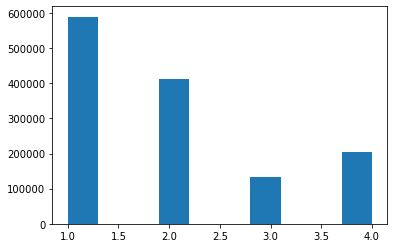

In [15]:
plt.hist(dc["AP"])

# AirPort preprocessing section

In [ ]:
#Run the below code for every airport data by just change the name of the file. Please follow the order:
#KLAX
#KBUR
#KVNY
#KWHP

In [52]:
ap1= pd.read_csv('E:\download/LA_County_Weather\KLAX.csv')#هربار عوضش میکنیم
ap1['WindSpeed'] =ap1['WindSpeed'].replace([-1000],0)
ap1['Temp'] =ap1['Temp'].replace([-1000],0)
ap1['Humd'] =ap1['Humd'].replace([-1000],0)
ap1['Pressure'] =ap1['Pressure'].replace([-1000],0)
ap1['Visib'] =ap1['Visib'].replace([-1000],0)


D:\apps\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [53]:
conditions = [
    (ap1['hour'] >= 0) & (ap1['hour'] < 2),
    (ap1['hour'] >= 2) & (ap1['hour'] < 4),
    (ap1['hour'] >= 4) & (ap1['hour'] < 6),
    (ap1['hour'] >= 6) & (ap1['hour'] < 8),
    (ap1['hour'] >= 8) & (ap1['hour'] < 10),
    (ap1['hour'] >= 10) & (ap1['hour'] < 12),
    (ap1['hour'] >= 12) & (ap1['hour'] < 14),
    (ap1['hour'] >= 14) & (ap1['hour'] < 16),
    (ap1['hour'] >= 16) & (ap1['hour'] < 18),
    (ap1['hour'] >= 18) & (ap1['hour'] < 20),
    (ap1['hour'] >= 20) & (ap1['hour'] < 22),
    (ap1['hour'] >= 22) & (ap1['hour'] < 24),
    ]
# create a list of the values we want to assign for each condition
values = ['01','02','03','04','05','06','07','08','09','10','11','12']
# create a new column and use np.select to assign values to it using our lists as arguments
ap1["patern"] = np.select(conditions, values)

#for months
ap1["month"] = ap1["month"].replace([1], '01')
ap1["month"] = ap1["month"].replace([2], '02')
ap1["month"] = ap1["month"].replace([3], '03')
ap1["month"] = ap1["month"].replace([4], '04')
ap1["month"] = ap1["month"].replace([5], '05')
ap1["month"] = ap1["month"].replace([6], '06')
ap1["month"] = ap1["month"].replace([7], '07')
ap1["month"] = ap1["month"].replace([8], '08')
ap1["month"] = ap1["month"].replace([9], '09')


#for months
ap1["day"] = ap1["day"].replace([1], '01')
ap1["day"] = ap1["day"].replace([2], '02')
ap1["day"] = ap1["day"].replace([3], '03')
ap1["day"] = ap1["day"].replace([4], '04')
ap1["day"] = ap1["day"].replace([5], '05')
ap1["day"] = ap1["day"].replace([6], '06')
ap1["day"] = ap1["day"].replace([7], '07')
ap1["day"] = ap1["day"].replace([8], '08')
ap1["day"] = ap1["day"].replace([9], '09')

ap1["Day"]=ap1["day"]
ap1["Month"]=ap1["month"]
ap1["Acc_Time1"]=ap1["year"].astype(str)+ap1["Month"].astype(str)+ap1["Day"].astype(str)+ap1["patern"].astype(str)
ap1["Acc_Time1"]=ap1["Acc_Time1"].astype(int)
ap1

,Airport,Date,Hour,Temp,WindChill,Humd,Pressure,Visib,WindSpeed,WindDir,...,Conditions,Unnamed: 13,day,month,year,hour,patern,Day,Month,Acc_Time1
0,KLAX,8/11/2016,9:53 PM,68.0,-1000.0,81,30.01,10.0,12.7,West,...,Scattered Clouds,NaN,11,08,2016,21,11,11,08,2016081111
1,KLAX,8/11/2016,11:53 PM,66.9,-1000.0,81,30.02,10.0,9.2,West,...,Mostly Cloudy,NaN,11,08,2016,23,12,11,08,2016081112
2,KLAX,8/11/2016,2:53 PM,75.9,-1000.0,56,30.00,10.0,13.8,WSW,...,Partly Cloudy,NaN,11,08,2016,14,08,11,08,2016081108
3,KLAX,8/11/2016,4:53 PM,72.0,-1000.0,68,29.97,10.0,17.3,West,...,Partly Cloudy,NaN,11,08,2016,16,09,11,08,2016081109
4,KLAX,8/11/2016,10:08 PM,68.0,-1000.0,81,30.02,10.0,12.7,West,...,Mostly Cloudy,NaN,11,08,2016,22,12,11,08,2016081112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49942,KLAX,12/31/2020,7:53 PM,59.0,59.0,32,29.81,10.0,13.0,NW,...,Fair,NaN,31,12,2020,19,10,31,12,2020123110
49943,KLAX,12/31/2020,8:53 PM,59.0,59.0,33,29.82,10.0,9.0,NNW,...,Fair,NaN,31,12,2020,20,11,31,12,2020123111
49944,KLAX,12/31/2020,9:53 PM,58.0,58.0,33,29.84,10.0,10.0,NNW,...,Partly Cloudy,NaN,31,12,2020,21,11,31,12,2020123111
49945,KLAX,12/31/2020,10:53 PM,57.0,57.0,36,29.85,10.0,3.0,VAR,...,Partly Cloudy,NaN,31,12,2020,22,12,31,12,2020123112


In [54]:
ap1=ap1.sort_values(by=["Acc_Time1"])

In [55]:
ap1=ap1.sort_values(by=["Acc_Time1"])
dc1=dc[dc["AP"]==1]# اینو به ترتیب واسه هر فایل از 1 تا 4 عوض میکنیم

In [56]:
#dc1=dc1.groupby(['Acc_Time1']).agg({"congestion_count":"count"})
ap1["WindDir"]=ap1["WindDir"].fillna(-1000)
ap1["time"]=ap1["Acc_Time1"]
ap11=ap1.groupby(['Acc_Time1']).agg({"time":"mean","Temp":"mean","Humd":"mean","Pressure":"mean","Visib":"mean",
                                    "WindSpeed":"mean"})
ap12=ap1.groupby(['Acc_Time1'])["Conditions"].agg(lambda x: pd.Series.mode(x))
ap13=ap1.groupby(['Acc_Time1'])["WindDir"].agg(lambda x: pd.Series.mode(x)[0])
ap1=pd.concat([ap11,ap12],axis=1)
ap1=pd.concat([ap1,ap13],axis=1)


D:\apps\anaconda\lib\site-packages\pandas\core\algorithms.py:892: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
D:\apps\anaconda\lib\site-packages\pandas\core\algorithms.py:892: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  warn(f"Unable to sort modes: {err}")


In [57]:
merged_left1 = pd.merge(left=dc1, right=ap1, how='left', left_on=['twelve'], right_on=['Acc_Time1'])

In [62]:
cn=pd.concat([merged_left1,merged_left2,merged_left3,merged_left4],axis=0)

In [64]:
cn.shape

(1598112, 17)

In [66]:
# again slice to save 
cn1 = cn[: int(1598112/2)]
cn2 = cn[int(1598112/2):]

In [67]:
with pd.ExcelWriter(r'E:\bachelor project\bachelorweather for 2018-2019- 12parts.xlsx') as writer:
    cn1.to_excel(writer, sheet_name='index12_1')
    cn2.to_excel(writer, sheet_name='index12_2')

# continue

In [3]:
dc1= pd.read_excel(r'E:\paper\weather for 2018-2019- 12parts.xlsx', sheet_name='index12_1' )
dc2= pd.read_excel(r'E:\paper\weather for 2018-2019- 12parts.xlsx', sheet_name='index12_2' )

In [4]:
dc = dc1.append(dc2, ignore_index=True)

In [5]:
dc['geohash'].nunique()

150

In [6]:
for i in range(len(dc)):
    if type(dc['Conditions'][i]) == str:
        a = (dc['Conditions'][i]).split("'")
        if len(a)>1:
            dc['Conditions'][i] = a[1]

<ipython-input-6-856273680142>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc['Conditions'][i] = a[1]


In [8]:
dc = dc.replace(to_replace=['Fair / Windy'], value='Fair', regex=True)
dc = dc.replace(to_replace=['Light Rain / Windy'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Rain / Windy'], value='Rain', regex=True)
dc = dc.replace(to_replace=['Cloudy / Windy'], value='Cloudy', regex=True)
dc = dc.replace(to_replace=['Smoke / Windy'], value='Smoke', regex=True)
dc = dc.replace(to_replace=['Haze / Windy'], value='Haze', regex=True)
dc = dc.replace(to_replace=['Partly Cloudy / Windy'], value='Partly Cloudy', regex=True)
dc = dc.replace(to_replace=['Mostly Cloudy / Windy'], value='Mostly Cloudy', regex=True)
# dc = dc.replace(to_replace=['[]'], value='Clear', regex=True)

In [13]:
dc['Conditions'].value_counts()

Clear            367626
Fair             256086
Partly Cloudy    183702
Mostly Cloudy    181862
Cloudy            96956
Overcast          82774
Light Rain        34078
Haze              30920
Fog               14886
Heavy Rain         3216
Smoke              2992
Mist               1998
Unknown             182
Thunder              66
[]                   48
Name: Conditions, dtype: int64

In [10]:
dc = dc.replace(to_replace=['Scattered Clouds'], value='Partly Cloudy', regex=True)
dc = dc.replace(to_replace=['Patches of Fog'], value='Fog', regex=True)
dc = dc.replace(to_replace=['Rain'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Light Drizzle'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Shallow Fog'], value='Fog', regex=True)
dc = dc.replace(to_replace=['Thunderstorm'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['Drizzle'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Heavy Thunderstorms and Rain'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['T-Storm'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['Light Thunderstorms and Rain'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Light Rain with Thunder'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Thunderstorms and Rain'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['Blowing Dust / Windy'], value='Mist', regex=True)
dc = dc.replace(to_replace=['Blowing Dust'], value='Mist', regex=True)

In [12]:
dc = dc.replace(to_replace=['Light Light Rain'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Heavy Light Rain'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['Heavy Heavy Rains and Light Rain'], value='Heavy Rain', regex=True)
dc = dc.replace(to_replace=['Light Heavy Rains and Light Rain'], value='Light Rain', regex=True)
dc = dc.replace(to_replace=['Heavy Rains and Light Rain'], value='Heavy Rain', regex=True)

In [16]:
dc.shape
dc1 = dc[: int(1339200/2)]
dc2 = dc[int(1339200/2):]

In [17]:
with pd.ExcelWriter(r'E:\bachelor project\bachelorweather for 2018-2019- 12parts.xlsx') as writer:
    dc1.to_excel(writer, sheet_name='index12_1')
    dc2.to_excel(writer, sheet_name='index12_2')